In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_train=pd.read_csv('data/train.csv')
df_store=pd.read_csv('data/store.csv')

/tmp/ipykernel_10615/1131126083.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv('data/train.csv')


## Datacleaning

# train.csv

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_train.columns=['store',
    'day_of_week',
    'date',
    'sales',
    'customers',
    'open',
    'promo',
    'state_holiday',
    'school_holiday']

In [6]:
df_train['state_holiday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Zu Klassifizieren mit '0':0;'a':1;'b':2;'c':3 

In [7]:
df_train['state_holiday']=df_train['state_holiday'].replace('0',0)
df_train['state_holiday']=df_train['state_holiday'].replace('a',1)
df_train['state_holiday']=df_train['state_holiday'].replace('b',2)
df_train['state_holiday']=df_train['state_holiday'].replace('c',3)

df_train['state_holiday']=df_train['state_holiday'].astype(int)

df_train['state_holiday'].unique()

array([0, 1, 2, 3])

'Date' als Datetime formatieren und Tag Monat und Jahr seperat auslesen.

In [8]:
df_train['date']=pd.to_datetime(df_train['date'])

df_train['year']=df_train['date'].dt.year

df_train['month']=df_train['date'].dt.month

df_train['day']=df_train['date'].dt.day

df_train['week_of_year']=df_train['date'].dt.weekofyear

/tmp/ipykernel_10615/2819681802.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_train['week_of_year']=df_train['date'].dt.weekofyear


Zusatzlich Spalten für Monats- / Jahres- / Quartalsanfang / -ende anlegen.

In [9]:
df_train['is_month_end']=df_train['date'].dt.is_month_end

df_train['is_month_start']=df_train['date'].dt.is_month_start

df_train['is_quarter_end']=df_train['date'].dt.is_quarter_end

df_train['is_quarter_start']=df_train['date'].dt.is_quarter_start

df_train['is_year_end']=df_train['date'].dt.is_year_end

df_train['is_year_start']=df_train['date'].dt.is_year_start

# store.csv

In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]['CompetitionDistance'].unique()

array([1.070e+03, 3.100e+02, 3.270e+03, 3.240e+03, 1.040e+03, 2.300e+03,
       2.170e+03, 2.910e+03, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       2.050e+03, 2.256e+04, 7.660e+03, 2.500e+02, 1.130e+03, 4.840e+03,
       3.300e+02, 3.320e+03, 7.910e+03, 2.710e+03, 2.410e+03, 2.400e+02,
       1.669e+04, 1.462e+04, 8.980e+03, 1.793e+04, 2.440e+03, 6.190e+03,
       7.890e+03, 4.510e+03, 2.000e+03, 2.460e+03, 9.000e+02, 5.190e+03,
       1.540e+03, 1.657e+04, 2.800e+02, 8.540e+03, 1.780e+03, 1.642e+04,
       3.050e+03, 1.184e+04, 1.254e+04, 2.640e+03, 1.100e+02, 1.309e+04,
       4.130e+03, 3.770e+03, 1.710e+03, 4.800e+02, 1.390e+03, 9.670e+03,
       3.560e+03, 1.936e+04, 8.500e+02, 5.200e+02, 1.697e+04, 2.200e+02,
       2.026e+04, 3.800e+02, 6.870e+03, 1.500e+02, 1.900e+02, 3.150e+03,
       6.400e+02, 7.930e+03, 4.500e+02, 2.370e+03, 1.080e+04, 1.890e+03,
       4.370e+03, 3.200e+02, 6.100e+02, 7.800e+02, 1.310e+03, 3.520e+03,
       3.400e+02, 2.233e+04, 2.100e+02, 4.580e+03, 

In [12]:
df_store[df_store['Promo2']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 1113
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      544 non-null    int64  
 1   StoreType                  544 non-null    object 
 2   Assortment                 544 non-null    object 
 3   CompetitionDistance        542 non-null    float64
 4   CompetitionOpenSinceMonth  396 non-null    float64
 5   CompetitionOpenSinceYear   396 non-null    float64
 6   Promo2                     544 non-null    int64  
 7   Promo2SinceWeek            0 non-null      float64
 8   Promo2SinceYear            0 non-null      float64
 9   PromoInterval              0 non-null      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 46.8+ KB


Die Werte für Promo2SinceWeek, Promo2SinceYear und PromoInterval sind genau dann Null, wenn Promo2==0 gilt.
Die Spalten mit Buchstaben auf numerische WErte umsetzen.

In [13]:
#set assortment to numeric values
df_store['Assortment'] = df_store['Assortment'].map({'a': 1, 'b': 2, 'c': 3})

In [14]:
#set storetype to numeric values
df_store['StoreType'] = df_store['StoreType'].map({'a': 1, 'b': 2, 'c': 3, 'd': 4})

df_store.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   int64  
 2   Assortment                 1115 non-null   int64  
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [15]:
#convert to snake case
df_store.columns = ['store',
 'storetype',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   store                         1115 non-null   int64  
 1   storetype                     1115 non-null   int64  
 2   assortment                    1115 non-null   int64  
 3   competition_distance          1112 non-null   float64
 4   competition_open_since_month  761 non-null    float64
 5   competition_open_since_year   761 non-null    float64
 6   promo2                        1115 non-null   int64  
 7   promo2_since_week             571 non-null    float64
 8   promo2_since_year             571 non-null    float64
 9   promo_interval                571 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 87.2+ KB


In [16]:
#set promo_interval to numeric values
df_store['promo_interval'] = df_store['promo_interval'].map({'Jan,Apr,Jul,Oct': 1, 'Feb,May,Aug,Nov': 2, 'Mar,Jun,Sept,Dec': 3})



In [17]:
#fill missing values for promo2_since_week and promo2_since_year and promo_interval
df_store['promo2_since_week'] = df_store['promo2_since_week'].fillna(-1)
df_store['promo2_since_year'] = df_store['promo2_since_year'].fillna(-1)
df_store['promo_interval'] = df_store['promo_interval'].fillna(-1)




In [18]:
#fill missing values for competition_open_since_month and competition_open_since_year with mean
df_store['competition_open_since_month'] = df_store['competition_open_since_month'].fillna(df_store['competition_open_since_month'].mean())
df_store['competition_open_since_year'] = df_store['competition_open_since_year'].fillna(df_store['competition_open_since_year'].mean())
#also fill missing values for competition_distance with mean
df_store['competition_distance'] = df_store['competition_distance'].fillna(df_store['competition_distance'].mean())


In [19]:
df_store.head()

,store,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


# merge train and store data

In [20]:
#merge train and store data
df_train_store = pd.merge(df_train, df_store, how='left', on='store')

In [21]:
df_train_store.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,year,...,is_year_start,storetype,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,False,3,1,1270.0,9.0,2008.0,0,-1.0,-1.0,-1.0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,False,1,1,570.0,11.0,2007.0,1,13.0,2010.0,1.0
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,False,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,False,3,3,620.0,9.0,2009.0,0,-1.0,-1.0,-1.0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,False,1,1,29910.0,4.0,2015.0,0,-1.0,-1.0,-1.0


## Explorative Datenanalyse

<Axes: xlabel='year,week_of_year'>

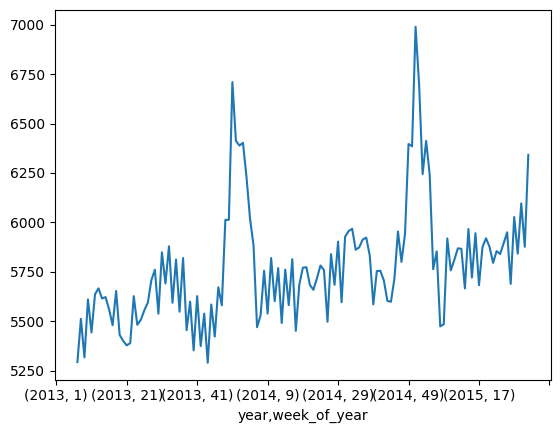

In [22]:
# plot sales by year and week of year rolling mean

df_train_store.groupby(['year','week_of_year'])['sales'].mean().rolling(7).mean().plot()

<Axes: xlabel='year,month'>

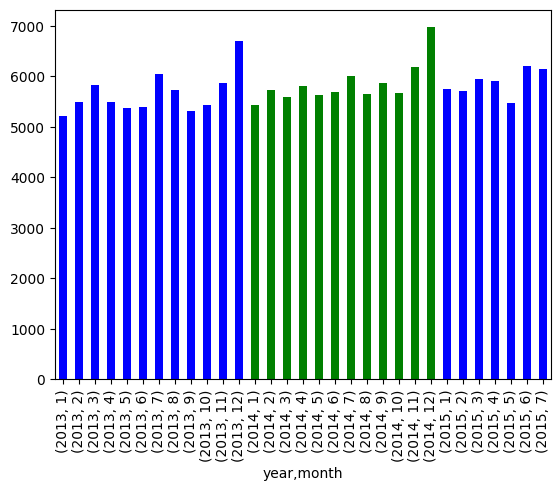

In [23]:
# plot sales by year and month as bar chart
colors = {2013: 'r', 2014: 'b', 2015: 'g'}
df_train_store.groupby(['year','month'])['sales'].mean().plot(kind='bar', color=['b' if i<12 else 'g' for i in range(0,24)])

/tmp/ipykernel_10615/2280170276.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train_store.corr()


<Axes: >

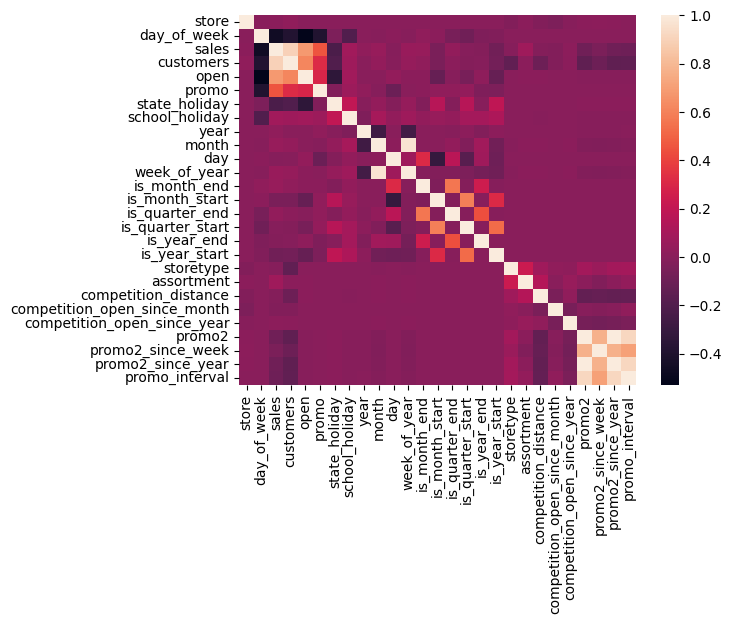

In [24]:
#heatmap of correlation matrix
import seaborn as sns
corr = df_train_store.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



In [25]:
print(corr['sales'][(corr['sales']>.02) | (corr['sales']<-.02)])


day_of_week                    -0.462125
sales                           1.000000
customers                       0.894711
open                            0.678472
promo                           0.452345
state_holiday                  -0.229029
school_holiday                  0.085124
year                            0.023519
month                           0.048768
week_of_year                    0.052946
is_month_end                    0.047112
is_month_start                 -0.053450
is_quarter_end                  0.027899
is_year_start                  -0.084589
assortment                      0.074941
competition_open_since_month   -0.023490
promo2                         -0.091040
promo2_since_week              -0.045965
promo2_since_year              -0.091056
promo_interval                 -0.095965
Name: sales, dtype: float64


<Axes: xlabel='open,promo'>

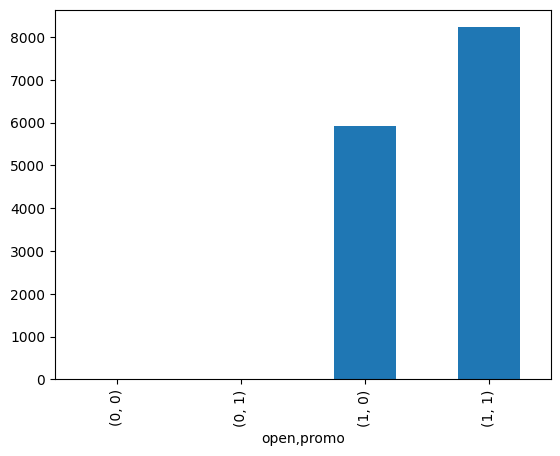

In [26]:
#plot sales by open and promo
df_train_store.groupby(['open','promo'])['sales'].mean().plot(kind='bar')


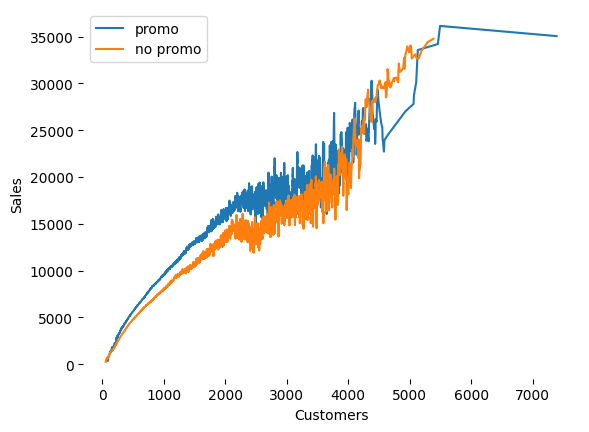

In [27]:
#plot multiple lineplots in one window
df_train_store[df_train_store['promo']==1].groupby(['customers'])['sales'].mean().rolling(7).mean().plot()
df_train_store[df_train_store['promo']==0].groupby(['customers'])['sales'].mean().rolling(7).mean().plot()
#legend
plt.legend(['promo','no promo'])
#axis labels
plt.xlabel('Customers')
plt.ylabel('Sales')
#disable box around plot
plt.box(False)

<Axes: xlabel='day_of_week'>

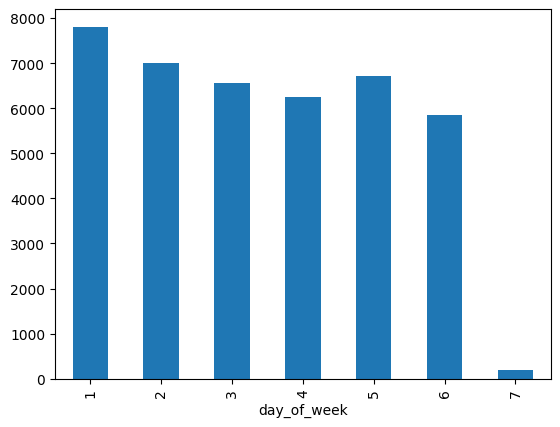

In [28]:
#plot sales by day of week
df_train_store.groupby(['day_of_week'])['sales'].mean().plot(kind='bar') 

## Vorhersagen der

In [29]:

#select features
features = corr['sales'][(corr['sales']>.02) | (corr['sales']<-.02)].index
features = features.drop('sales')

#select target
target = 'sales'

In [30]:
#predict sales knn  regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV



#limit dataset to 100000 rows at random
df_train_store_sample = df_train_store.sample(n=100000, random_state=42)

#split data into train and test
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(df_train_store_sample[features], df_train_store_sample[target], test_size=0.6, random_state=42)

#instantiate model
knn = KNeighborsRegressor()

#fit model
knn.fit(knn_X_train,knn_y_train)

#predict
knn_y_pred = knn.predict(knn_X_test)

#calculate mean squared error

print(mean_squared_error(knn_y_test, knn_y_pred))

#calculate r2 score

print(r2_score(knn_y_test, knn_y_pred))


2513233.282634
0.832454676921708


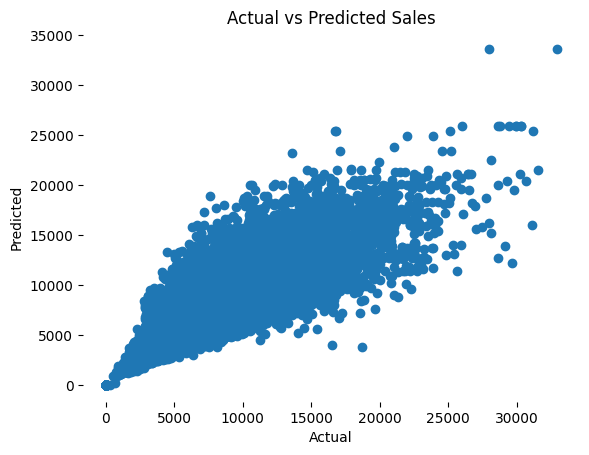

In [31]:

#plot actual vs predicted
plt.scatter(knn_y_test, knn_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.box(False)





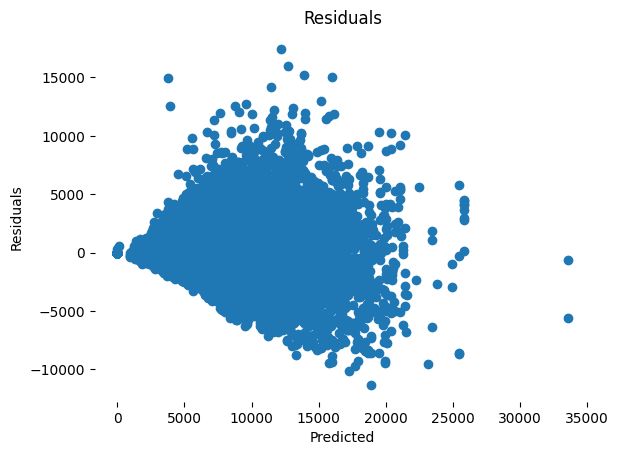

In [32]:
#plot residuals
plt.scatter(knn_y_pred, knn_y_test-knn_y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.box(False)


In [33]:
#predict sales adaboost regression with gridsearch
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#split data into train and test
ada_X_train, ada_X_test, ada_y_train, ada_y_test = train_test_split(df_train_store_sample[features], df_train_store_sample[target], test_size=0.6, random_state=42)

#instantiate model
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=100)

#fit model
ada.fit(ada_X_train, ada_y_train)

#predict
ada_y_pred = ada.predict(ada_X_test)

#calculate rmse
print(np.sqrt(mean_squared_error(ada_y_test, ada_y_pred)))

#calculate r2
print(r2_score(ada_y_test, ada_y_pred))



1631.9420909937214
0.8224547758296341


Text(0, 0.5, 'Predicted')

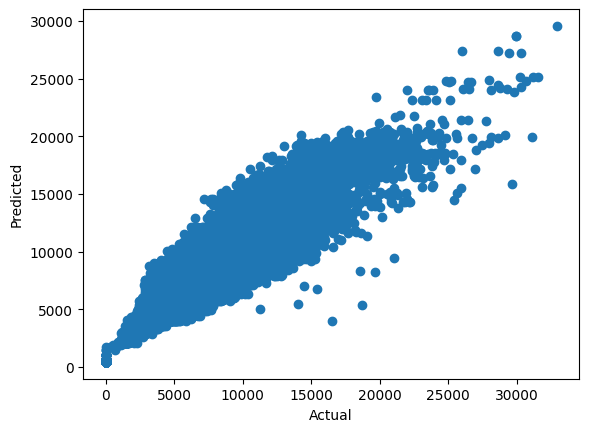

In [34]:
#plot actual vs predicted
plt.scatter(ada_y_test, ada_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


Text(0, 0.5, 'Residuals')

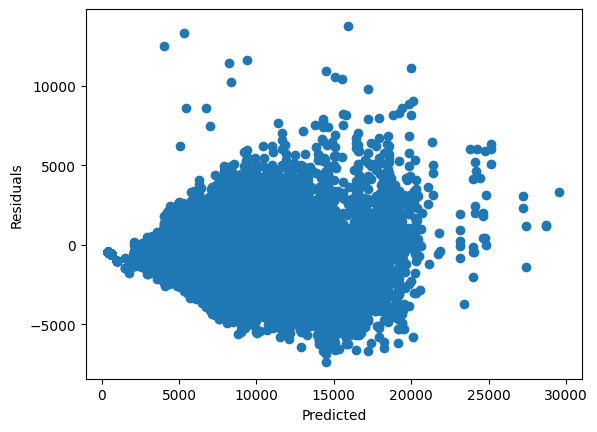

In [35]:
#plot residuals
plt.scatter(ada_y_pred, ada_y_test-ada_y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')


In [36]:
#predict sales svm regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#split data into train and test
svm_X_train, svm_X_test, svm_y_train, svm_y_test = train_test_split(df_train_store_sample[features], df_train_store_sample[target], test_size=0.6, random_state=42)

#instantiate model
svm = SVR()

#fit model
svm.fit(svm_X_train, svm_y_train)

#predict
svm_y_pred = svm.predict(svm_X_test)

#calculate rmse
print(np.sqrt(mean_squared_error(svm_y_test, svm_y_pred)))

#calculate r2
print(r2_score(svm_y_test, svm_y_pred))


3051.111059260029
0.37939461588609


Text(0, 0.5, 'Predicted')

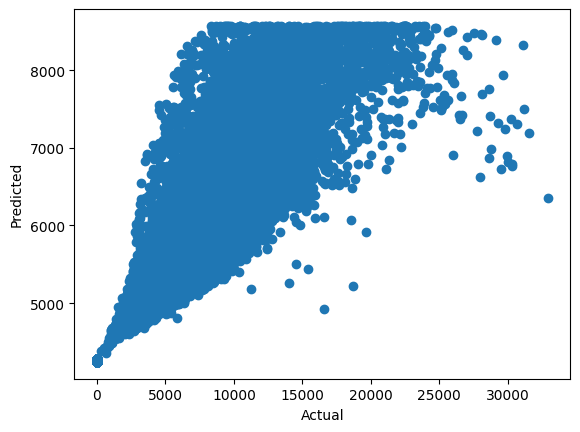

In [37]:
#plot actual vs predicted
plt.scatter(svm_y_test, svm_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')



Text(0, 0.5, 'Residuals')

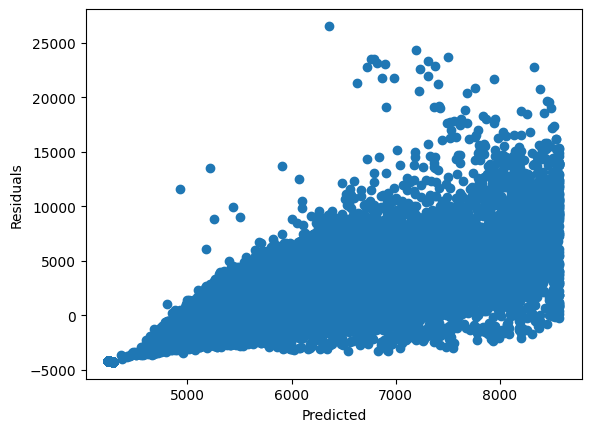

In [38]:
#plot residuals
plt.scatter(svm_y_pred, svm_y_test-svm_y_pred)
plt.xlabel('Predicted')
plt.ylabel('Residuals')